# Chapter 2. Fancy Tricks with Simple Numbers

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Example 2-1. Binarizing listen counts in the Million Song Dataset

### The Echo Nest Taste Profile Subset 

http://labrosa.ee.columbia.edu/millionsong/sites/default/files/challenge/train_triplets.txt.zip

In [3]:
listen_count = pd.read_csv('data/train_triplets.txt.zip', header=None, delimiter='\t')
listen_count.shape

(48373586, 3)

In [4]:
listen_count.head()  # user - song - count

,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [7]:
# 재생 카운트 최대값
np.max(listen_count[2])

9667

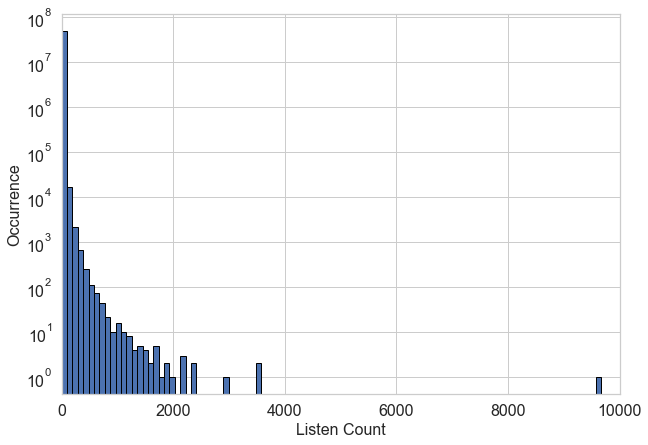

In [8]:
# 그림 2-3
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.hist(listen_count[2], bins = 100, edgecolor='black')
plt.yscale('log', nonposy='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,10000])
_ = plt.xlabel('Listen Count', fontsize=16)
_ = plt.ylabel('Occurrence', fontsize=16)

## Example 2-2. Visualizing business review counts in the Yelp dataset

### Yelp Challenge Round 12

https://www.yelp.com/dataset/challenge

In [9]:
import json

In [10]:
def load_json_df(filename, num_bytes = -1):
    '''Load the first `num_bytes` of the filename as a json blob, convert each line into a row in a Pandas data frame.'''
    # windows에서 실행하는 경우 기본 인코딩이 cp949 이므로 encoding 값 지정해야 함.
    fs = open(filename, encoding='utf-8')
    df = pd.DataFrame([json.loads(x) for x in fs.readlines(num_bytes)])
    fs.close()
    return df

In [11]:
# Cargando datos de Negocios
biz_df = load_json_df('data/yelp_academic_dataset_business.json')
biz_df.shape

(192609, 14)

In [12]:
biz_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [13]:
# Recuento Maximo
biz_df['review_count'].max()

8348

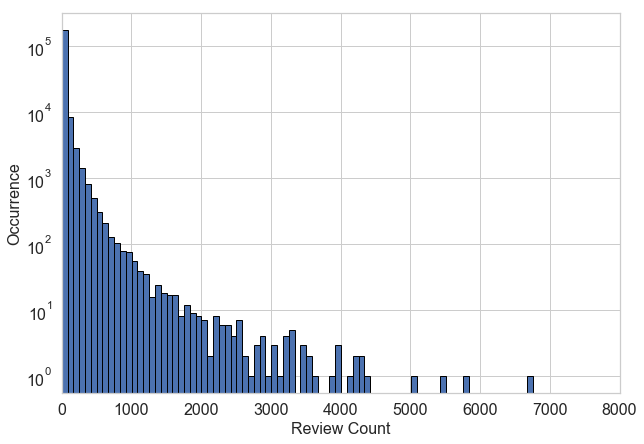

In [14]:
#Figure 2-4. Histogram of business review counts in the Yelp reviews dataset—the y-axis
#is on a log scale
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
biz_df['review_count'].hist(ax=ax, bins=100, edgecolor='black')
ax.set_yscale('log', nonposy='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,8000])
_ = ax.set_xlabel('Review Count', fontsize=16)
_ = ax.set_ylabel('Occurrence', fontsize=16)

## Example 2-3. Quantizing counts with fixed-width bins
Cuantificación de conteos con contenedores de ancho fijo.

In [15]:
# Genera 20 enteros aleatorios uniformemente de 0 a 99
small_counts = np.random.randint(0, 100, 20) 
small_counts

array([95, 15, 40, 15, 78, 29, 68, 58, 38, 16, 98, 32, 61, 96, 85, 98, 25,
        4, 18, 22])

In [16]:
# Divida por 10 y asigne para vaciar 0 - 9 con el mismo intervalo
np.floor_divide(small_counts, 10)

array([9, 1, 4, 1, 7, 2, 6, 5, 3, 1, 9, 3, 6, 9, 8, 9, 2, 0, 1, 2],
      dtype=int32)

In [17]:
# Una matriz de recuentos que abarcan varios dígitos.
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222] 

# Mapeo a beans exponenciales a través de la función log
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

## Example 2-4. Computing deciles of Yelp business review counts
Cómputo deciles de la cantidad de negocio de Yelp 


In [18]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]) 
deciles 

0.1     3.0
0.2     4.0
0.3     5.0
0.4     7.0
0.5     9.0
0.6    13.0
0.7    19.0
0.8    33.0
0.9    70.0
Name: review_count, dtype: float64

Text(0,0.5,'Occurrence')

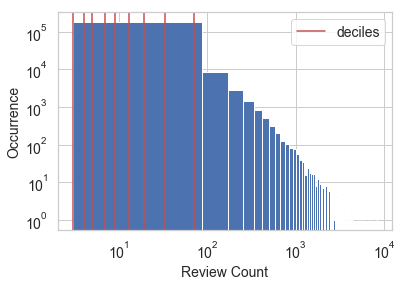

In [27]:
#Figure 2-5. Deciles of the review counts in the Yelp reviews dataset—both the x- and yaxes are on a log scale
#Los deciles de la cuenta cuentan en el conjunto de datos de reseñas de Yelp, 
#tanto el x como el yax están en una escala de registro

sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
for pos in deciles: 
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

## Example 2-5. Binning counts by quantiles
Binning cuenta por cuantiles

In [28]:
# Mapeo de cuentas con cuartiles
pd.qcut(large_counts, 4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3], dtype=int64)

In [29]:
# Calculo cuantil
large_counts_series = pd.Series(large_counts) 
large_counts_series.quantile([0.25, 0.5, 0.75]) 

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

## Example 2-6. Visualizing the distribution of review counts before and after log transform
Visualización de la distribución de recuentos de revisiones antes y después de la transformación del registro

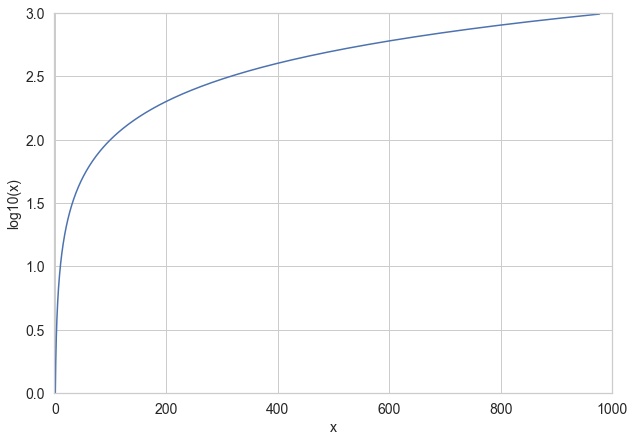

In [30]:
#Figure 2-6. The log function compresses the high numeric range and expands the low range
#La función de registro comprime el rango numérico alto y expande el rango bajo
y = np.arange(0.00001, 3, 0.01)
x = np.power(10, y)

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(x, y, 'b')
ax.tick_params(labelsize=14)
plt.xlim([-1,1000])
plt.ylim([0,3.0])
_ = ax.set_xlabel('x', fontsize=14)
_ = ax.set_ylabel('log10(x)', fontsize=14)

In [31]:
# Conversión de registro para recuento de revisión
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)

Text(0,0.5,'Occurrence')

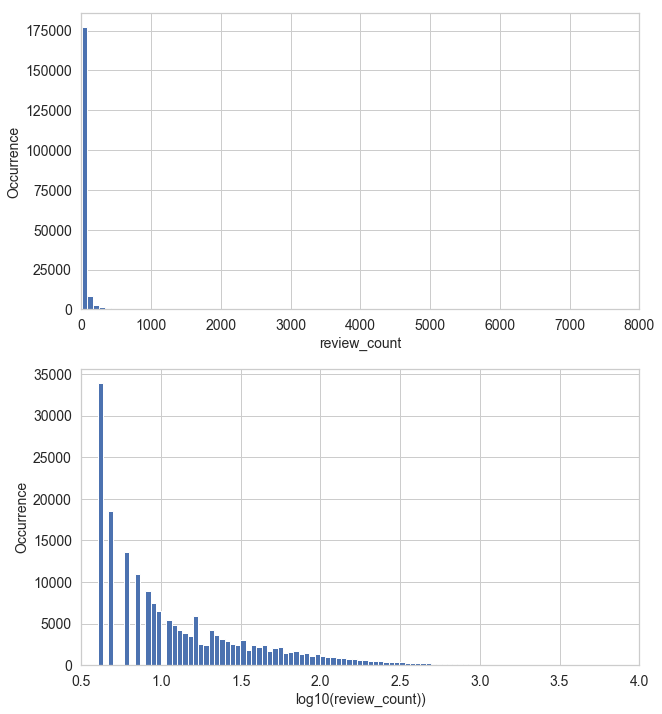

In [32]:
# Figure 2-7. Comparison of Yelp business review counts before (top) and after (bottom) log transformation


# Antes de la conversión de registro
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10, 12))
biz_df['review_count'].hist(ax=ax1, bins=100) 
ax1.tick_params(labelsize=14)
ax1.set_xlim([0,8000])
ax1.set_xlabel('review_count', fontsize=14) 
ax1.set_ylabel('Occurrence', fontsize=14)

# Después de la conversión de registro
biz_df['log_review_count'].hist(ax=ax2, bins=100) 
ax2.tick_params(labelsize=14)
ax2.set_xlim([0.5,4.0])
ax2.set_xlabel('log10(review_count))', fontsize=14) 
ax2.set_ylabel('Occurrence', fontsize=14)

## Example 2-7. Visualizing the distribution of news article popularity with and without log transformation

Ejemplo 2-7. Visualizando la distribución de la popularidad de los artículos de noticias con y sin
transformación de registro
### Online News Popularity Dataset

https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

In [33]:
news_df = pd.read_csv('data/OnlineNewsPopularity.csv', delimiter=', ')   # ignorar la advertencia
news_df.head()

C:\Users\ejc_2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [34]:
news_df.shape

(39644, 61)

In [35]:
news_df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [36]:
news_df['log_n_tokens_content'] = np.log10(news_df['n_tokens_content'] + 1)

Text(0,0.5,'Number of Articles')

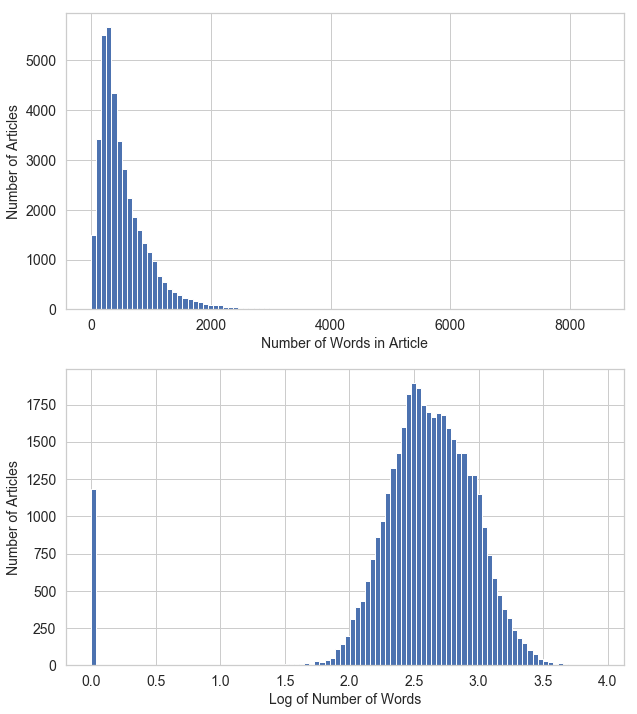

In [37]:
#Figure 2-8. Comparison of word counts in Mashable news articles before (top) and after (bottom) log transformation

#Comparación de recuentos de palabras en artículos de noticias de Mashable antes (superior) y después (inferior) 
#de la transformación de registro

plt.figure(figsize=(10, 12))
ax = plt.subplot(2,1,1)
news_df['n_tokens_content'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Number of Words in Article', fontsize=14)
ax.set_ylabel('Number of Articles', fontsize=14)

ax = plt.subplot(2,1,2)
news_df['log_n_tokens_content'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Log of Number of Words', fontsize=14)
ax.set_ylabel('Number of Articles', fontsize=14)

## Example 2-8. Using log transformed Yelp review counts to predict average business rating
El uso de log transformado cuenta de reseñas de Yelp para predecir la calificación promedio de negocios

In [38]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [39]:
# Para predecir la calificación promedio de una empresa mediante el aprendizaje de un modelo de regresión lineal
# review_count - Utilice el valor antes y después de la transformación de registro de la característica.

# Compare las puntuaciones de validación cruzada para los 10 iguales de ambos modelos.

m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, biz_df[['review_count']], biz_df['stars'], cv=10)

m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, biz_df[['log_review_count']], biz_df['stars'], cv=10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: 0.00160 (+/- 0.00090)
R-squared score with log transform: 0.00408 (+/- 0.00147)


## Example 2-9. Using log transformed word counts in the Online News Popularity dataset to predict article popularity
El uso de registros de palabras transformadas en el conjunto de datos de popularidad de noticias en línea para predecir la popularidad del artículo

In [40]:
# Se estudian dos modelos de regresión lineal para predecir la cantidad de intercambio de artículos de noticias.
# Un modelo usa la función original y el otro usa las funciones transformadas de registro

news_orig_model = linear_model.LinearRegression()
scores_orig = cross_val_score(news_orig_model, news_df[['n_tokens_content']], news_df['shares'], cv=10)

news_log_model = linear_model.LinearRegression()
scores_log = cross_val_score(news_log_model, news_df[['log_n_tokens_content']], news_df['shares'], cv=10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))

print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: -0.00114 (+/- 0.00418)


## Example 2-10. Visualizing the correlation between input and output in the news popularity prediction problem

Visualización de la correlación entre la entrada y la salida en el problema de predicción de la popularidad de las noticias

Text(0,0.5,'Number of Shares')

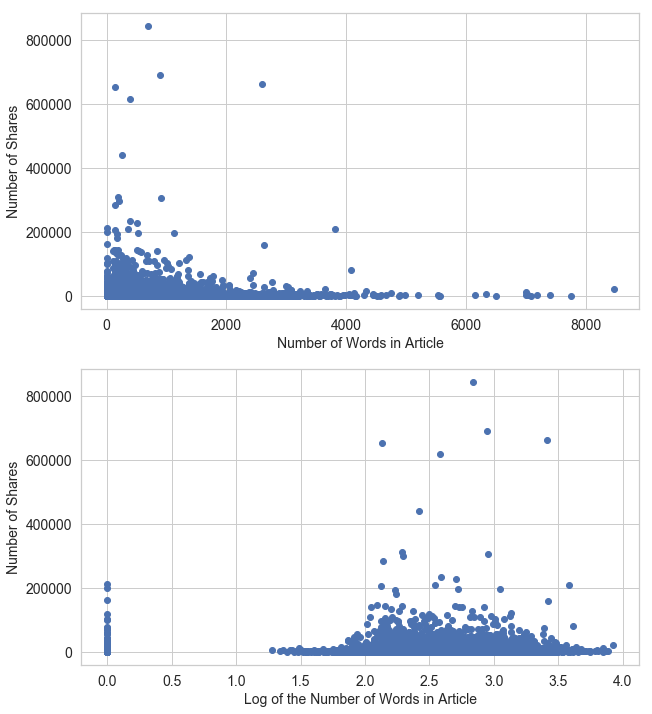

In [41]:
#Figura 2-9. Diagramas de dispersión de cantidad de palabras (entrada) versus cantidad de acciones (objetivo) en
#el conjunto de datos de popularidad de las noticias en línea: la trama superior visualiza la característica original, y
#la gráfica inferior muestra la gráfica de dispersión después de la transformación del registro

plt.figure(figsize=(10, 12))
ax1 = plt.subplot(2,1,1)
ax1.scatter(news_df['n_tokens_content'], news_df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2 = plt.subplot(2,1,2)
ax2.scatter(news_df['log_n_tokens_content'], news_df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)

## Example 2-11. Visualizing the correlation between input and output in Yelp business review prediction

Text(0,0.5,'Average Star Rating')

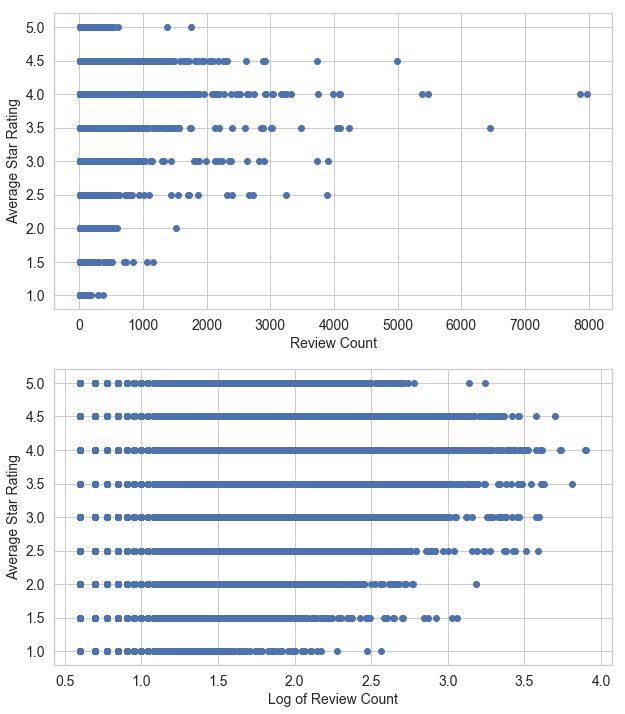

In [32]:
# 그림 2-10
plt.figure(figsize=(10, 12))
ax1 = plt.subplot(2,1,1)
ax1.scatter(biz_df['review_count'], biz_df['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating', fontsize=14)

ax2 = plt.subplot(2,1,2)
ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)

## Example 2-12. Box-Cox transformation of Yelp business review counts

In [33]:
x = np.arange(0.001, 3, 0.01)
lambda0 = np.log(x)
one_quarter = (x**0.25 - 1)/0.25
square_root = (x**0.5 - 1)/0.5
three_quarters = (x**0.75 - 1)/0.75
one_point_five = (x**1.5 - 1)/1.5

Text(0.5,1,'Box-Cox Transforms')

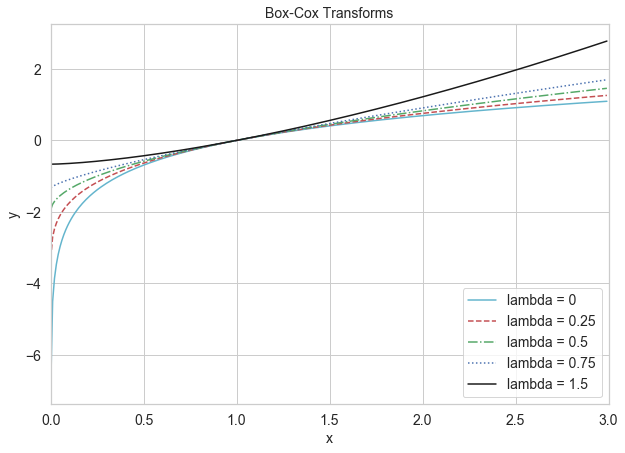

In [34]:
# 그림 2-12
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(x, lambda0, 'c', 
         x, one_quarter, 'r--', 
         x, square_root, 'g-.', 
         x, three_quarters, 'b:',
         x, one_point_five, 'k')
plt.legend(['lambda = 0', 'lambda = 0.25', 'lambda = 0.5', 'lambda = 0.75', 'lambda = 1.5'], 
           loc='lower right',
           prop={'size': 14})
ax.tick_params(labelsize=14)
ax.set_xlim([0.0,3.0])
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Box-Cox Transforms', fontsize=14)

In [35]:
from scipy import stats

In [36]:
# Box-Cox 변환은 입력 데이터가 양수라고 가정한다.
# 최소값을 확인한다.
biz_df['review_count'].min()

3

In [37]:
# 입력 파라미터 lmbda를 0으로 설정하면 로그 변환을 한다 (상수 오프셋 없음)
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)

# 기본적으로 Box-Cox 변환의 scipy 구현은 
# 출력을 정규 분포에 가장 가깝게 만드는 람다 파라미터를 찾는다.
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
bc_params

-0.3809438089654094

## Example 2-13. Visualizing the histograms of original, log transformed, and Box-Cox transformed counts

In [38]:
biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log

Text(0,0.5,'Occurrence')

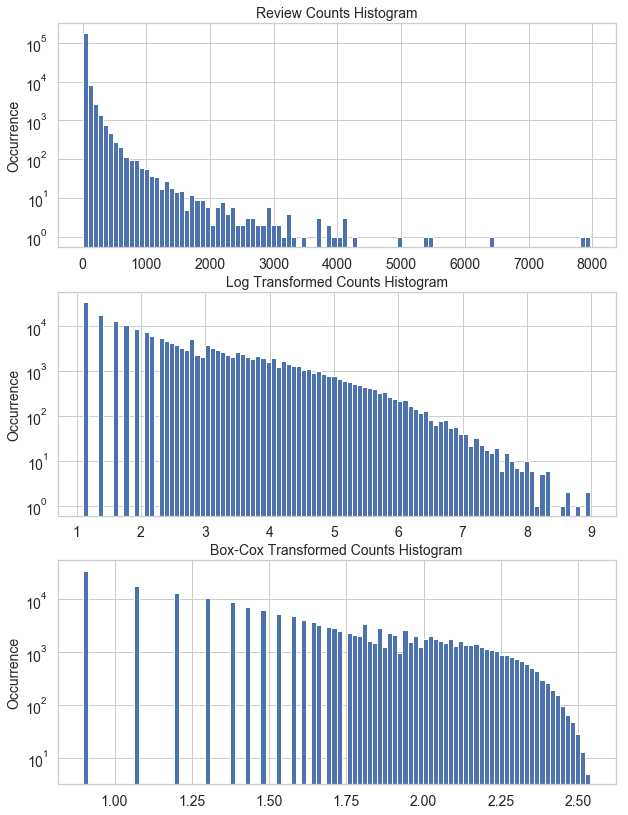

In [39]:
# 그림 2-13
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 14))

# 원본 리뷰 카운트 히스토그램
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log', nonposy='clip')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# 로그 변환된 리뷰 카운트
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log', nonposy='clip')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# Box-Cox 변환된 리뷰 카운트
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log', nonposy='clip')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

## Example 2-14. Probability plots of original and transformed counts against the normal distribution

Text(0.5,1,'Probplot after Box-Cox transform')

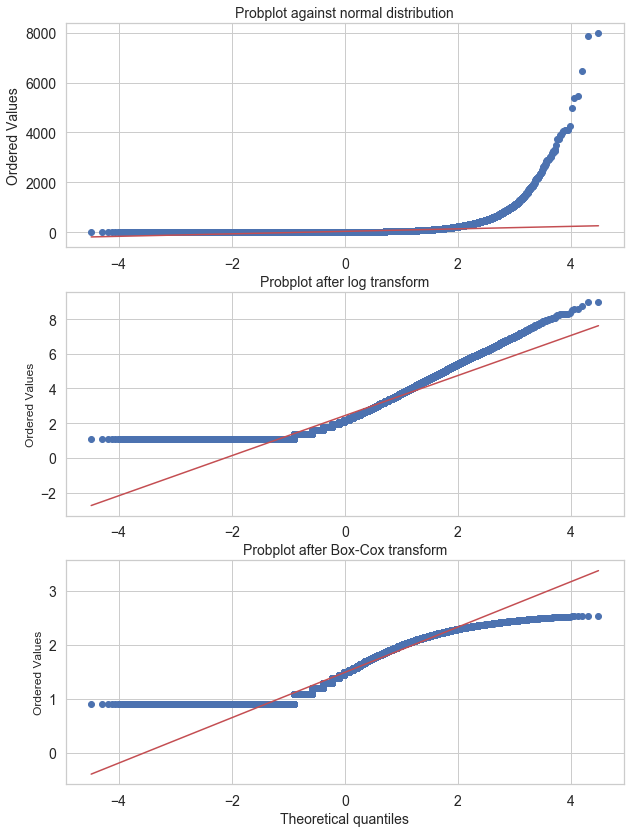

In [40]:
# 그림 2-14
fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 14))

prob1 = stats.probplot(biz_df['review_count'], dist=stats.norm, plot=ax1)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Ordered Values', fontsize=14)
ax1.set_title('Probplot against normal distribution', fontsize=14)

prob2 = stats.probplot(biz_df['rc_log'], dist=stats.norm, plot=ax2)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('')
ax1.set_ylabel('Ordered Values', fontsize=14)
ax2.set_title('Probplot after log transform', fontsize=14)

prob3 = stats.probplot(biz_df['rc_bc'], dist=stats.norm, plot=ax3)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Theoretical quantiles', fontsize=14)
ax1.set_ylabel('Ordered Values', fontsize=14)
ax3.set_title('Probplot after Box-Cox transform', fontsize=14)

## Example 2-15. Feature scaling example

In [41]:
import sklearn.preprocessing as preproc

In [42]:
news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_n_tokens_content
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2.342423
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2.408240
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2.326336
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2.725912
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3.030600


In [43]:
# 원본 데이터 확인 - 기사의 단어 수
# news_df['n_tokens_content'].as_matrix() --> warning
news_df['n_tokens_content'].values

array([219., 255., 211., ..., 442., 682., 157.])

In [44]:
# Min-max scaling
news_df['minmax'] = preproc.minmax_scale(news_df[['n_tokens_content']])
news_df['minmax'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

In [45]:
# 표준화 - 정의에 따라 일부 출력은 음수가 될 수 있다.
news_df['standardized'] = preproc.StandardScaler().fit_transform(news_df[['n_tokens_content']])
news_df['standardized'].values

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

In [46]:
# L2-normalization
news_df['l2_normalized'] = preproc.normalize(news_df[['n_tokens_content']], axis=0)
news_df['l2_normalized'].values

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

## Example 2-16. Plotting the histograms of original and scaled data

Text(0.5,39.5,'L2-normalized word count')

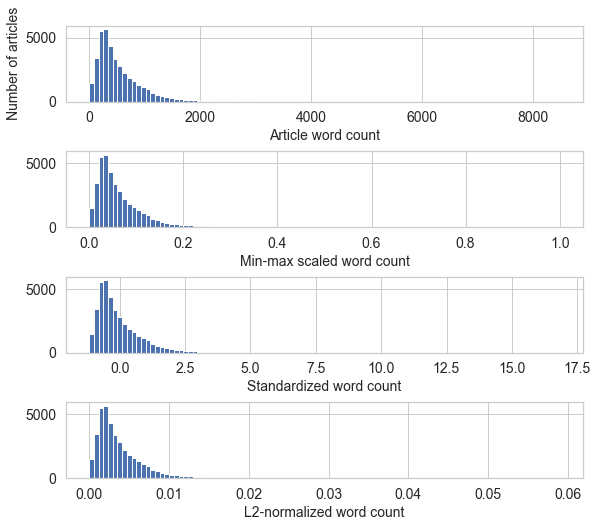

In [47]:
# 그림 2-18

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8, 7))
fig.tight_layout(h_pad=2.0)

news_df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

news_df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
# ax2.set_ylabel('Number of articles', fontsize=14)

news_df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
# ax3.set_ylabel('Number of articles', fontsize=14)

news_df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
# ax4.set_ylabel('Number of articles', fontsize=14)

## Example 2-17. Example of interaction features in prediction

In [48]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc

In [49]:
# UCI Online News Popularity dataset
news_df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [50]:
# 파생 피쳐를 제외하고 컨텐츠 기반 피쳐만을 선택하여 모델에서 사용한다.
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
            'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 
            'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
            'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']

In [51]:
X = news_df[features]
y = news_df[['shares']]

X.shape

(39644, 17)

In [52]:
# 쌍별 조합을 이용한 상호작용 피쳐 생성. 상수 편향은 무시.
# 피쳐의 수 확인!
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X2.shape

(39644, 170)

In [53]:
# 두 개의 피쳐 집합을 모두 트레이닝셋/테스트셋으로 분할
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)

In [54]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and score on the test set"""
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [55]:
# 두 피쳐 집합에 대해 모델을 학습시키고 점수를 비교

(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)

(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0113280904
